# Funzione di densità di probabilità

La derivata di una funzione di ripartizione di una distribuzione analitica è chiamata funzione di densità di probabilità (PDF).
Per esempio la funzione PDF di una distribuzione esponenziale si può scrivere:

$$PDF_{expo}(x)=\lambda e^{-\lambda x}$$

La funzione PDF di una distribuzione normale si scrive:

$$PDF_{normal}(x)= \frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)$$
  
Valutare la funzione per un particolare valore di x di solito non è utile. Il risultato non è una probabilità ma una **densità** di probabilità.

In fisica, la densità è la massa per unità di volume, per ottenere la massa dobbiamo moltiplicare per il volume. Mentre se la densità non è costante dobbiamo integrare sul volume.

Similmente la **densità di probabilità** misura la probabilità per unità di x. Per ottenere la probabilità dobbiamo integrare su x.

## Stima kernel di densità

La stima kernel di densità (KDE) è un algoritmo che prende un campione e trova una curva pdf che approssima i dati, `scipy` ci dà una implementazione dell'algoritmo vediamo come usarla:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    return x

x = make_data(1000)

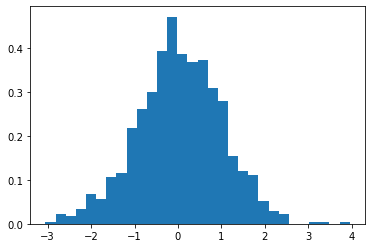

In [2]:
hist = plt.hist(x, bins=30, density=True)

In [3]:
kde = gaussian_kde(x)

In [4]:
point = 0.5
density = kde.evaluate(point)
print("Density at point {0:.2f} is {1:.2f}".format(point,density[0]))


Density at point 0.50 is 0.36


In [5]:
gx = np.linspace(-4, 4, 100)
gy = kde(gx)

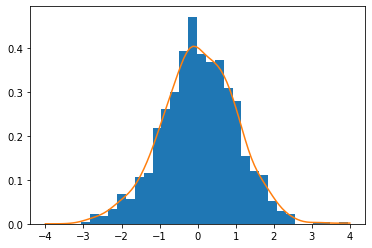

In [6]:
plt.hist(x, bins=30, density=True)
plt.plot(gx,gy)

La figura qui sopra mostra un esempio di distribuzione normale e la sua approssimazione basata sull'algoritmo KDE.
Stimare la funzione di densità con l'algoritmo KDE può essere utile per i seguenti scopi:

* **Visualizzazione** durante la fase di esplorazione in un progetto la funzione di ripartizione è tipicamente la miglior visualizzazione di una distribuzione. Dopo aver controlla si può decidere quale funzione di probabilità approssima meglio i dati. Si può usare questa funzione per presentare il dato ad un pubblico meno familiare con la funzione di ripartizione.

* **Interpolazione** La funzione di densità stimata è un modo per ottenere un campione di un modello di una popolazione. Se hai ragione di credere che la distribuzione di una popolazione è regolare, possiamo usare il metodo KDE per estrapolare i valori di densità che non appaiono nel campione.

* **Simulazione** La simulazione è spesso basata sulla distribuzione di campioni. Se la dimensione di un campione è piccola, potrebbe essere appropriato usare la funzione kde la quale permette di esplorare piu risultati possibili, piuttosto che replicare i dati osservati.

## Le relazioni tra i vari tipi di funzione

A questo punto abbiamo visto le seguenti funzioni PMF,CDF e PDF prendiamoci un minuto per vedere le relazioni che intercorrono tra loro.
Siamo partiti con la funzione di probabilità (PMF) che rappresenta le probabilità per un insieme discreto di valori.
Da li siamo andati verso la funzione (CDF) funzione di ripartizione eseguendo una sommatoria.
Per tornare indietro da CDF a PMF basta eseguire l'operazione contraria.

La funzione PDF rappresenta la derivata della funzione CDF continua ed ovviamente possiamo ritornare alla stessa mediante integrando la stessa.

Per trasformare una distribuzione discreta in una continua si possono eseguire differenti tipi di "lisciamento" smoothing.
Un tipo di smoothing è quello di assumere che i dati provengano da una distribuzione continua (tipo quella esponenziale o quella normale) e stimare i parametri, un'altra opzione è quella del KDE visto prima.

L'opposto dello smoothing e quello della discretizzazione o quantizzazione.
Se portiamo una funzione pdf tramite la discretizzazione in una funzione pmf possiamo calcolare facilmente l'integrale ed avere una approssimazione numerica.

<img src="./images/framework.png"/>

## Momenti

Ogni volta che si prende un campione e lo si riduce ad un numero si sta facendo statistica.
Le statistiche che abbiamo visto fino ad ora sono la media, la varianza, la mediana e lo scarto interquantile.

Il momento è un ulteriore tipo di statistica, se si ha un campione di valori $x_p$ il $k$esimo momento è dato dalla formula.

$$m_k = \frac{1}{n}\sum_{i}x_{i}^{k}$$

per k=1 abbiamo la media, gli altri momenti non hanno molto significato ma sono usati in alcuni algoritmi.

Scriviamo questa formula in pyhton

In [7]:
def rawmoment(xs,k):
    return sum(x**k for x in xs) / len(xs)

rawmoment([1,2,3,4],2)

7.5

il momento centrale risulta più utile, il $k$esimo momento centrale

$$m_k = \frac{1}{n}\sum_{i}\left(x_{i} - \overline{x}\right)^{k}$$

espresso in pyhton

In [8]:
def centralmoment(xs,k):
    mean = rawmoment(xs,1)
    return sum((x-mean)**k for x in xs) / len(xs)

centralmoment([1,2,3,4],2)

1.25

Per k=2 abbiamo di fronte il concetto di varianza. La definizione di varianza ci da un suggerimento sul perchè questa misura viene chiamata momento. Se attaccassimo un peso ad ogni posizione $x_i$ e poi ruotassimo il righello attorno alla media, il momento di inerzia dei pesi rotanti è la varianza dei valori.

Quando si usano i momenti nella statistica è importante ricordare l'unità di misura di partenza. Se partiamo dai $cm$ il primo momento sarà misurato in $cm$, il secondo in $cm^2$ e così via

Questa misura però è difficile da comprendere ed è per questo che si usa la deviazione standard che rappresenta la radice quadrata della varianza.

## Simmetria

La simmetria è una proprietà che descrive la figura della distribuzione. Se ad esempio i valori tendono ad allungarsi verso destra si dice che la distribuzione e asimmetrica verso destra altrimenti se la distribuzione a asimmetrica verso sinistra si dirà che la distribuzione a asimmetrica verso sinistra.

Ci sono molti metodi per quantificare la simmetria di una distribuzione. Data una sequenza di valori $x_i$ l'assimetria del campione $g_1$ può essere calcolata come segue.

In [9]:
import math
def standardizedMoment(xs,k):
    var = centralmoment(xs,2)
    std = math.sqrt(var)
    return centralmoment(xs,k) / std**k
    
def skewness(xs):
    return standardizedMoment(xs,3)

skewness([1,2,3,4,4,4])

-0.649519052838329

in valore negativo indica una assimmetria verso sinistra mentre in valore positivo una verso destra, la grandezza del valore indica quanto quanto la distribuzione è asimmetrica.

In pratica calcolare la simmetria non è tipicamente una buona idea, in quanto se avessimo dei outliers la misura sarebbe fortemente farsata.

Un altro modo per valutare la simmetria di una distribuzione è quello di guardare la relazione tra la media e la mediana. I valori estremi hanno più effetto sulla media che sulla mediana, dunque una distribuzione asimmetrica verso sinistra la media sarà più piccola della mediana.

## Indice di Pearson

L'indice di Pearson è una misura della asimmetria basata sulla differenza la media e la mediana.
La formula è la seguente:
$$g_p = 3 \frac{ \overline{x} - m }{\sigma}$$

espresso in pyhton

In [10]:
import statistics

def pearsonmedianskewness(xs):
    median = statistics.median(xs)
    mean = statistics.mean(xs)
    std = statistics.stdev(xs)
    
    gp = 3 * (mean - median) / std
    return gp

pearsonmedianskewness([1,2,3,4,4,4])

-1.1858541225631423